In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# 통계량 계산이나 기본적인 데이터분석을 위한 패키지
import scipy as sp
import scipy.stats

#시각화 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#시각화에서 음수를 표현하기 위한 설정
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

# 경고창 지우기 - 경진대회에서만 사용
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 파이썬≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mpl.rcParams['axes.unicode_minus'] = False

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

import seaborn as sns

import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해
# np.random.seed(42)

# KMeans 알고리즘

In [3]:
from sklearn.datasets import make_blobs

# 중심점의 좌표
blob_centers = np.array([[0.2, 0.3], [-1.5, 2.3],
                        [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
# 중심점에서의 편차
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# 데이터 생성
X, y = make_blobs(n_samples = 2000, centers = blob_centers,
                 cluster_std = blob_std, random_state = 42)

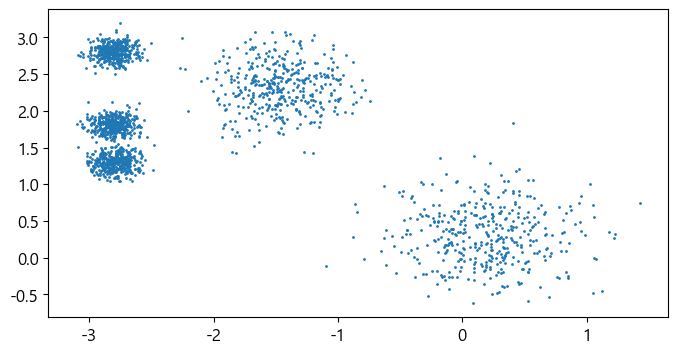

In [4]:
# 데이터 분포를 시각화 하기 위한 함수
def plot_clusters(X, y = None) :
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 1)
    
plt.figure(figsize = (8, 4))
plot_clusters(X)
plt.show()

In [5]:
# 군집을 수행
from sklearn.cluster import KMeans

# 클러스터 개수
k = 5
kmeans = KMeans(n_clusters = k, random_state = 42)
y_pred = kmeans.fit_predict(X)
print(y_pred[:100])  # 예측한 클러스터를 출력
print('---------------------------------------------------')
print(y[:100])  # 생성할 때 사용한 타겟을 출력

[3 1 0 3 1 2 0 2 4 3 0 0 3 0 2 3 3 3 1 3 2 4 2 4 1 4 4 4 2 0 4 3 2 0 1 4 4
 3 2 3 0 4 3 1 2 4 3 0 0 4 0 0 3 0 2 0 2 1 3 3 1 3 0 3 1 1 1 2 2 0 4 2 4 1
 4 0 2 3 0 4 0 1 1 0 0 1 2 2 2 4 0 3 0 3 4 1 0 2 1 2]
---------------------------------------------------
[3 0 1 3 0 4 1 4 2 3 1 1 3 1 4 3 3 3 0 3 4 2 4 2 0 2 2 2 4 1 2 3 4 1 0 2 2
 3 4 3 1 2 3 0 4 2 3 1 1 2 1 1 3 1 4 1 4 0 3 1 0 3 1 3 0 0 0 4 4 1 2 4 2 0
 2 1 4 3 1 2 1 0 0 1 1 0 4 4 4 2 1 3 1 3 2 0 1 4 0 4]


In [6]:
# 군집을 수행한 센터의 값을 출력
print(kmeans.cluster_centers_)
print('------------------------')
print(blob_centers)

# 군집은 얼추 잘 맞는다
# 중심점 순서가 달라서 위에서 숫자가 바뀌었던 것

[[-1.458  2.32 ]
 [ 0.189  0.305]
 [-2.792  1.297]
 [-2.798  2.8  ]
 [-2.804  1.809]]
------------------------
[[ 0.2  0.3]
 [-1.5  2.3]
 [-2.8  1.8]
 [-2.8  2.8]
 [-2.8  1.3]]


In [7]:
# 예측 - 분류
print(kmeans.predict(np.array([[0, 2]]))) # 0 번 할당

[0]


## 속도 개선

In [8]:
# 전체 거리 계산을 수행하는 k-means
import time
start = time.time()

kmeans = KMeans(n_clusters = k, random_state = 42, algorithm = 'full')
y_pred = kmeans.fit_predict(X)

end = time.time()

print(end - start)
# 이너셔 (센터와의 거리) - 군집의 성능 평가 기준 중 하나로 centroid 와의 거리 제곱의 합의 제곱근
# 아무래도 군집이 잘 되면 centroid 와 가깝게 모이게 되므로 작은 값을 더 선호
print(kmeans.inertia_)

0.29033708572387695
217.95876455517003


In [9]:
# 전체 거리 계산을 수행하는 k-means
import time
start = time.time()

kmeans = KMeans(n_clusters = k, random_state = 42, algorithm = 'elkan')
y_pred = kmeans.fit_predict(X)

end = time.time()

print(end - start)
# 이너셔 (센터와의 거리)
print(kmeans.inertia_)

0.047035932540893555
217.95876455517003


In [10]:
# 전체 거리 계산을 수행하는 k-means
# 거리의 상한과 하한을 이용해서 거리 계산을 수행하는 K-Means
import time

tot_time = 0
for i in range(500):
    start = time.time()

    kmeans = KMeans(n_clusters = k, random_state = 42, algorithm = "full")
    y_pred = kmeans.fit_predict(X)
    end = time.time()
    tot_time += (end - start)

print(tot_time / 1000)
# 이너셔 (센터와의 거리)
print(kmeans.inertia_)

0.1883996844291687
217.95876455517003


In [11]:
# 미니 배치 k-means
import time
from sklearn.cluster import MiniBatchKMeans
start = time.time()

kmeans = MiniBatchKMeans(n_clusters = k, random_state = 42)
y_pred = kmeans.fit_predict(X)

end = time.time()

print(end - start)
# 이너셔 (센터와의 거리)
print(kmeans.inertia_)

0.24231600761413574
218.09475267654648


### 이너셔를 이용한 클러스터 개수 선택

In [12]:
#클러스터 개수를 1~9 까지 설정해서 KMeans 알고리즘을 훈련
kmeans_k = [KMeans(n_clusters = k, random_state = 42).fit(X) for k in range(1, 10)]
# 이너셔를 확인
inertias = [model.inertia_ for model in kmeans_k]
print(inertias)

[4498.2939241444965, 1257.8316663599771, 673.7824972824861, 270.4110204111314, 217.95876455517003, 176.4865561281109, 149.7539241239101, 123.93975205637295, 109.99459904563543]


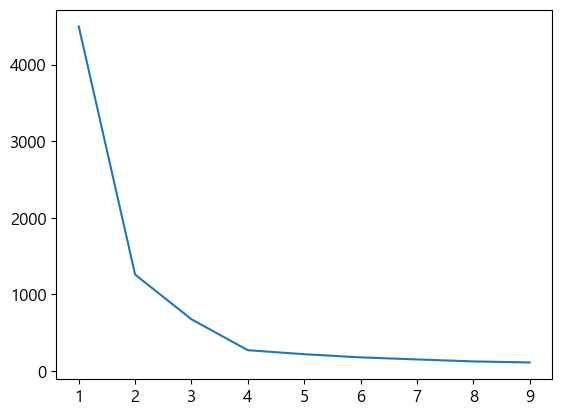

In [13]:
# 그래프로 시각화
plt.plot(range(1, 10), inertias)
plt.show()
# 변화가 거의 없는 n_clusters = 4를 선택하면 좋겠다

### 실루엣 점수 확인

In [14]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

0.690632654143417


In [15]:
kmeans_k = [KMeans(n_clusters = k, random_state = 42).fit(X) for k in range(2, 20)]

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_k]
print(silhouette_scores)
# 4번으로 아까 엘보 나온 부분이랑 똑같음

[0.6954304099191764, 0.5953410096138994, 0.7191873626687127, 0.690632654143417, 0.6087706495269795, 0.6141623189323498, 0.561350625593039, 0.5650418391374299, 0.5613874163975617, 0.5595090233148006, 0.5598368668765448, 0.5584953429220223, 0.4556185534991132, 0.4896327216611734, 0.49116886322626846, 0.4503359801756336, 0.42106998217771263, 0.49151033465662747]


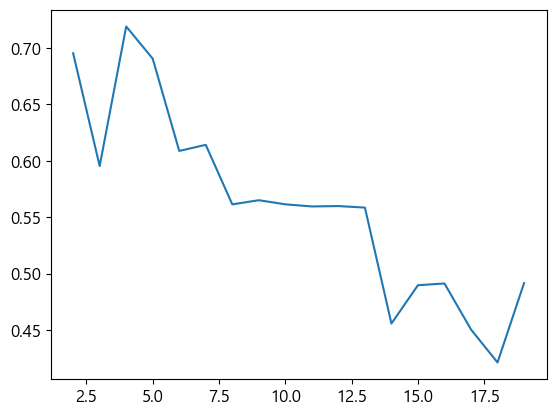

In [16]:
plt.plot(range(2, 20), silhouette_scores)
plt.show()

### 한계

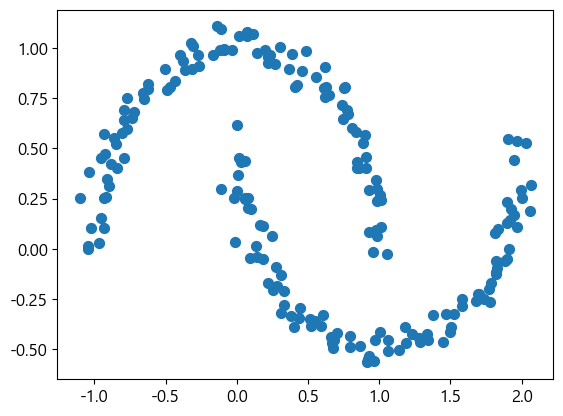

In [17]:
from sklearn.datasets import make_moons
# 0과 1 두 가지 클래스를 가진 반원 모양의 
X, y = make_moons(200, noise = 0.05, random_state = 42)
plt.scatter(X[:, 0], X[:, 1], s = 50, cmap = 'viridis')
# print(y)

[0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1
 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0
 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1
 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0]


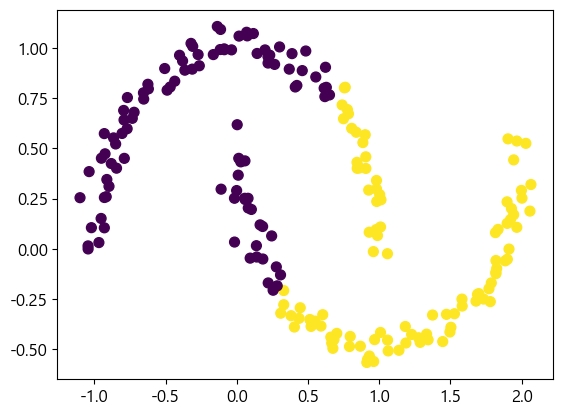

In [18]:
labels = KMeans(2, random_state = 42).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = labels, s = 50, cmap = 'viridis')
print(labels)

### 군집을 이용한 이미지 분할

In [19]:
# 이미지 데이터 가져오기
from matplotlib.image import imread

image = imread('data_ML/ladybug.png')
# 533 * 800 인 3 = 컬러 이미지
print(image.shape)

(533, 800, 3)


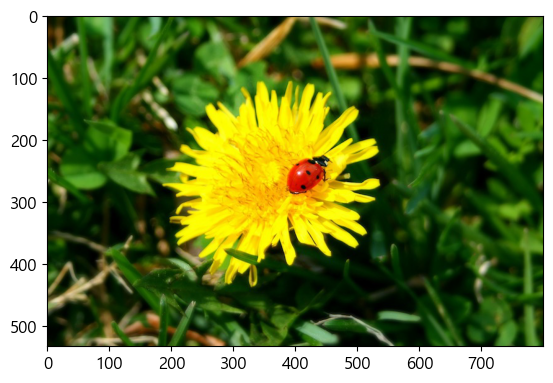

In [20]:
# 이미지 출력-머신러닝이나 딥러닝에서는 이미지를 1차원으로 만들어
# 사용하는 경우가 있음
# 출력을 할때는 가로* 세로* 색상 차원으로 변경해서 사용
plt.imshow(image)
plt.show()

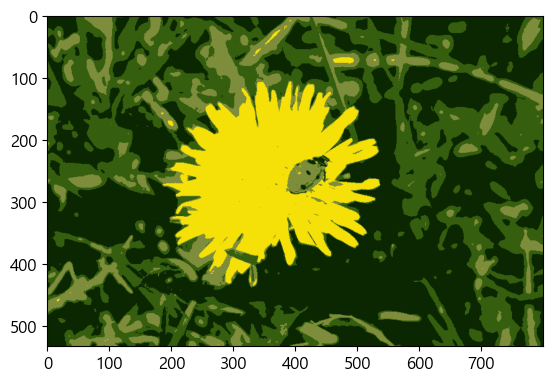

In [21]:
# 이미지의 차원을 변경 : 가로와 세로를 하나로 합치기
# 3차원 이미지를 2차원으로 수정
X = image.reshape(-1, 3)

kmeans = KMeans(n_clusters = 4, random_state = 42).fit(X)

# 군집한 결과 가져오기
# 레이블 된 데이터의 중심점의 값을 가졍괴 - 8개로 압축된 결과
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
plt.imshow(segmented_img.reshape(image.shape))
plt.show()

In [22]:
# 이미지의 차원을 변경 : 가로와 세로를 하나로 합치기
# 3차원 이미지를 2차원으로 수정
X = image.reshape(-1, 3)

# 클러스터링을 수행할 이미지를 저장할 list를 생성
segmented_imgs = []

n_colors = (20, 10, 8, 6, 4, 2)

for n_clusters in n_colors :
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

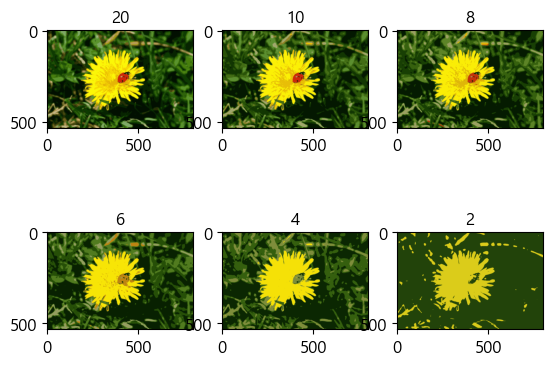

In [23]:
for idx, segmented_img in enumerate(segmented_imgs) :
    plt.subplot(232 + idx -1)
    plt.imshow(segmented_img)
    plt.title(n_colors[idx])
plt.show()


### 군집을 수행한 후 의 이미지 분류

In [24]:
# 훈련할 데이터를 생성
# 0-9 까지 흑백 이미지를 가져오기
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y = True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits,
                                                   random_state = 42)

In [25]:
print(X_train.shape) # 8*8 이미지 1347 개

(1347, 64)


In [26]:
# 분류 모델 훈련 및 결과 확인
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs',
                            max_iter = 5000, random_state = 42)
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)
print(log_reg_score)

0.9688888888888889


In [27]:
# 군집을 수행한 수 동일한 작업을 수행
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters = 50, random_state = 42)),
    ('log_reg', LogisticRegression(multi_class = 'ovr', solver = 'lbfgs',
                            max_iter = 5000, random_state = 42))
])

pipeline.fit(X_train, y_train)
print(pipeline.score(X_test,y_test))

# 일반적으로 군집한 결과를 피처로 추가하고 학습을 하면 예측 성능이 우수해질 가능성이 있습니다.
# GridSearchCV 등을 이용해서 최적의 하이퍼 파라미터를 찾아서 수행하면 됩니다.

0.9733333333333334


### 준지도 학습

In [28]:
# 이전에 사용한 숫자 이미지 데이터에서 훈련데이어 중 50개만 라벨링이 된 경우
# 이 데이터를 가지고 분류 모델을 만들게 되면 정확도가 많이 떨어짐

n_labeled = 50
log_reg = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs',
                            random_state = 42, max_iter = 5000)
log_reg.fit(X_train[: n_labeled], y_train[: n_labeled])
print(log_reg.score(X_test, y_test))

0.8333333333333334


In [30]:
# 대표 이미지 생성을 위한 군집을 수행
kmeans = KMeans(n_clusters = 50, random_state = 42)

# 각 centorid 와의 거리를 저장
X_digits_dist = kmeans.fit_transform(X_train)
# print(X_digits_dist)
# print(X_digits_dist.shape)

# centroid 와의 거리가 가장 가까운 샘플 데이터를 찾기
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
# print(representative_digit_idx)

X_representative_digit = X_train[representative_digit_idx]

In [31]:
# 임의의 레이블을 생성 - 대표 이미지의 현재 레이블 값
y_train[representative_digit_idx]

array([3, 8, 5, 1, 0, 4, 6, 7, 1, 2, 4, 5, 9, 9, 6, 2, 1, 7, 2, 8, 6, 7,
       9, 2, 0, 9, 2, 5, 4, 5, 0, 7, 1, 3, 7, 1, 2, 8, 4, 3, 7, 4, 5, 3,
       3, 9, 1, 3, 6, 8])

In [32]:
# 각 대표 이미지의 할당할 레이블
y_representative_digits = np.array([
    3, 8, 5, 1, 0, 4, 6, 7, 1, 2, 4, 5, 9, 9, 6, 2, 1, 7, 2, 8, 6, 7,
       9, 2, 0, 9, 2, 5, 4, 5, 0, 7, 1, 3, 7, 1, 2, 8, 4, 3, 7, 4, 5, 3,
       3, 9, 1, 3, 6, 8
])

In [33]:
# 대표 이미지와 새로 만든 임의의 레이블을 이용해서 분류를 수행
log_reg = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs',
                            random_state = 42, max_iter = 5000)

# 군집을 수행해서 생성된 대표 이미지와 레이블을 이용해서 학습
log_reg.fit(X_representative_digit, y_representative_digits)
print(log_reg.score(X_test, y_test))


0.8955555555555555


In [34]:
# 레이블 전파 : 대표 이미지에 라벨링한 값을 라벨이 없는 데이터들에 대입
# 훈련 데이터에 레이블을 만들기 위해서 훈련 데이터 만큼의 빈 배열을 생성
y_train_propagated = np.empty(len(X_train), dtype = np.int32)
for i in range(50) :
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

# 대표 이미지와 새로 만든 임의의 레이블을 이용해서 분류를 수행
log_reg = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs',
                            random_state = 42, max_iter = 5000)

# 군집을 수행해서 생성된 대표 이미지와 레이블을 이용해서 학습
log_reg.fit(X_train, y_train_propagated)
print(log_reg.score(X_test, y_test))

# 데이터를 수질할 때 라벨링이 되어 있지 않다고 데이터를 사용하지 않거나 하는 것은 바람직하지 않습니다.
# 라벨링 되지 않은 데이터에 군집을 이용해서 라벨링을 하고 분류를 수행하면 라벨링된 데이터만 가지고 분류를 수행하는 것 보다 효과적인 경우가 종종 있습니다.
# 실세계의 모든 데이터가 라벨링 된 경우는 거의 없고 대부분은 일부 라벨링 데이터를 가지고 지금처럼 유추해야하는 경우가 많습니다.


0.9288888888888889


## 계층적 클러스터링

### 샘플 데이터 생성과 거리 계산

In [35]:
import numpy as np
np.random.seed(42)

# 피처의 이름 - 3개
variables = ['X', 'Y', 'Z']

# 행의 이름(인덱스) - 5개
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

# 데이터 생성
X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns = variables, index = labels)
print(df)

          X      Y      Z
ID_0  3.745  9.507  7.320
ID_1  5.987  1.560  1.560
ID_2  0.581  8.662  6.011
ID_3  7.081  0.206  9.699
ID_4  8.324  2.123  1.818


In [36]:
# 각 데이터의 유클리디안 거리를 계산해서 데이터프레임으로 생성
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric = 'euclidean')),
                       columns = labels, index = labels)
print(row_dist)

        ID_0    ID_1    ID_2    ID_3    ID_4
ID_0   0.000  10.068   3.527  10.164  10.284
ID_1  10.068   0.000   9.973   8.323   2.419
ID_2   3.527   9.973   0.000  11.285  10.968
ID_3  10.164   8.323  11.285   0.000   8.206
ID_4  10.284   2.419  10.968   8.206   0.000


In [37]:
# 계층적 클러스터링 수행
from scipy.cluster.hierarchy import linkage

# 완전 연결 방식을 이용한 상향식 클러스터링 수행
row_clusters = linkage(row_dist, method = 'complete')
print(row_clusters)

# 첫 번째와 두 번째는 묶인 트리의 클러스터 이름, 세 번째는 클러스터 간 거리
# 네 번째는 클러스터 안의 데이터 개수
# 이 경우는 처음 시작할 때 5개의 데이터이므로 기본 클러스터 이름 0 - 4
# 묶일 때마다 클러스터 번호가 순차적으로 추가됨

[[ 1.     4.     3.571  2.   ]
 [ 0.     2.     5.159  2.   ]
 [ 3.     5.    13.182  3.   ]
 [ 6.     7.    18.783  5.   ]]


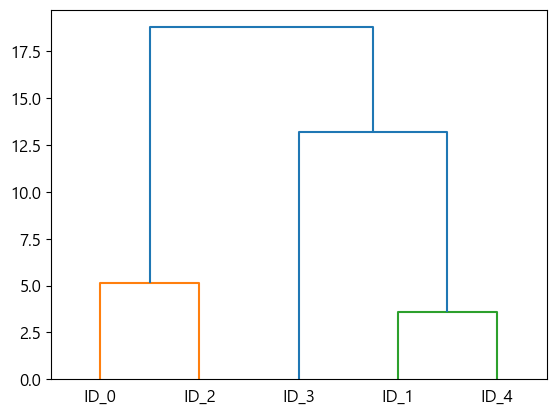

In [38]:
# 계층형 클러스터링 시각화
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels = labels)
plt.show()

### GMM

In [54]:
from sklearn.mixture import GaussianMixture

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[.374, .95], [.732, .598]]))

X2, y2 = make_blobs(n_samples = 250, centers=1, random_state=42)
X2 = X2 + [6, -8]

X = np.r_[X1, X2]
y = np.r_[y1, y2]

gm = GaussianMixture(n_components = 3, n_init = 10, random_state = 42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [55]:
# 각 클러스터의 평균 확인
print(gm.means_)

[[-1.408  1.427]
 [ 3.399  1.059]
 [ 0.051  0.075]]


In [56]:
print(gm.predict(X))

[2 2 0 ... 1 1 1]


In [57]:
# 예측 확인 - 소프트 군집
print(gm.predict_proba(X))

# 확률이 가장 높은 정규 분포의 클러스터에 배정

[[6.763e-07 2.318e-02 9.768e-01]
 [6.746e-04 1.641e-02 9.829e-01]
 [9.999e-01 1.998e-06 7.524e-05]
 ...
 [2.125e-26 1.000e+00 4.319e-07]
 [1.450e-41 1.000e+00 5.209e-16]
 [7.933e-41 1.000e+00 2.310e-15]]


In [58]:
print(gm.bic(X))
print(gm.aic(X))

8189.733705221638
8102.5084251066


## 최적의 클러스터 개수 찾기

In [62]:
# 클러스터 개수를 1개부터 10개까지 갖는 GMM 모델을 생성
gmm_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) 
             for k in range(1, 11)]

[9304.764002070573, 8914.757245988847, 8102.5084251066, 8111.5849706147155, 8125.085762738164, 8132.414696355936, 8139.836599398766, 8149.886191186008, 8156.795597746747, 8166.254450073727]


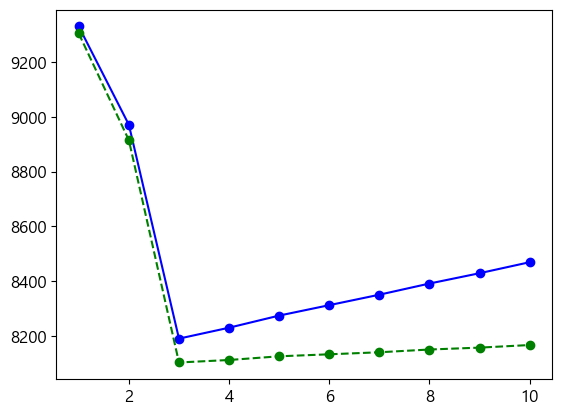

In [67]:
# bic & aic 값을 전부 저장
bics = [model.bic(X) for model in gmm_per_k]
aics = [model.aic(X) for model in gmm_per_k]

if bics < aics:
    print(bics)
else:
    print(aics)
    
plt.plot(range(1, 11), bics,  'bo-', label='BIC')
plt.plot(range(1, 11), aics,  'go--', label='AIC')
plt.show()
# 2개의 값 모두 3까지는 줄어들다가 4부터 높아짐
# 3개의 클러스터로 군집을 만드는 것이 좋음per_k]
aics = [model.aic(X) for model in gmm_per_k]

In [68]:
# BeysianGaussianMixture 모델 사용
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42).fit(X)

print(np.round(bgm.weights_, 3))

[0.395 0.205 0.001 0.399 0.    0.    0.    0.    0.    0.   ]


### 문제점 반달 모양의 데이터를 하나의 클러스터로 감지하지 못함

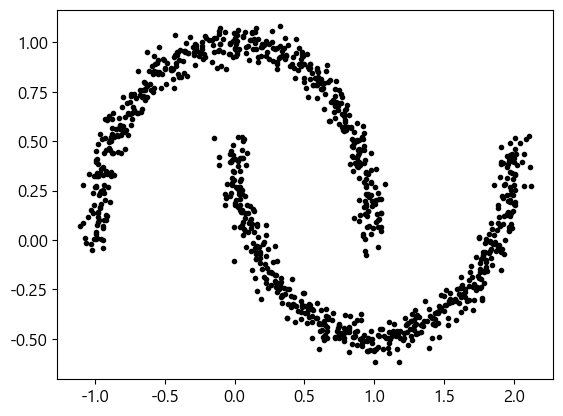

In [69]:
X_moons, y_moons = make_moons(n_samples=1000, noise=.05, random_state=42)
plt.plot(X_moons[:,0], X_moons[:,1], 'k.')
plt.show()

#타원형 데이터는 잘 구분하는데 반달처러 이어지기는 하지만
# 중간 중간 방향이나 기울기가 변경되면 다른 클러스터링으로 간주
# 이번의 경우는 8개월 클러스터로 구분

In [70]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42).fit(X_moons)
print(np.round(bgm.weights_, 3))
# 타원형 데이터는 잘 구분하는데, 반달처럼 이어지기는 하지만
# 중간 중간 방향이나 기울기가 변경되면 다른 클러스터로 간주
# 이번의 경우는 8개의 클러스터로 구분

[0.068 0.149 0.133 0.123 0.137 0.162 0.001 0.114 0.113 0.   ]
